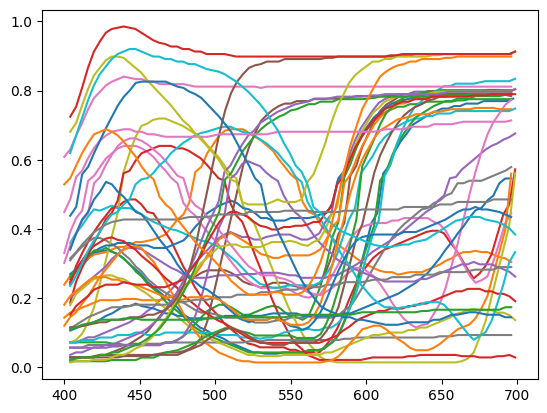

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import json
from spectra import Spectra

color_spectra = []

with open("./spectras","r") as file:
    data = json.load(file)
    # print(data)
    for i in range(1,45):
        s1 = np.array(data[str(i)])
        # print(s1[:,1])
        wavelengths = s1[:, 0]
        dt = s1[:, 1]
        plt.plot(wavelengths,dt)
        color_spectra.append(Spectra(wavelengths=wavelengths, data=dt))
    
        
    plt.show()

In [8]:
print(len(color_spectra))

44


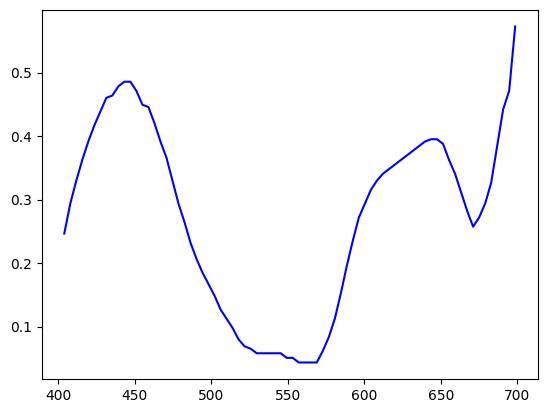

In [9]:
color_spectra[3].plot("blue", "blue")

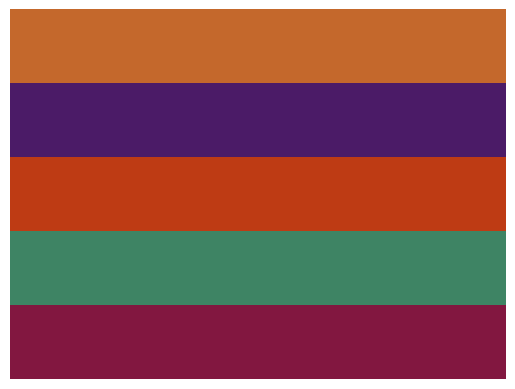

In [31]:
fig, ax = plt.subplots()

ax.set_xlim([0, 1])
ax.set_ylim([0, 5])

ax.axis('off')

for i, color in enumerate(color_spectra[:5]):
    rect_a = plt.Rectangle((0, i), 1, 1, linewidth=1, edgecolor='none', facecolor=color.to_rgb().reshape(-1))

    ax.add_patch(rect_a)
plt.show()

In order that is supposed to be red, blue, orange, green, and magenta. Looks like there are a few problems!

In [56]:
import colour
from metamers import Cone, Observer

In [105]:
red = np.array([247, 3, 16]) / 255
orange = np.array([188, 101, 15]) / 255
pink = np.array([241, 103, 197]) / 255
blue = np.array([115, 155, 233]) / 255

[ 0.26117586  0.09817599  0.0234573 ]
[ 0.22563282  0.15345629  0.02652849]
[ 0.37193093  0.26256815  0.53572059]
[ 0.31722924  0.36988912  0.76289826]


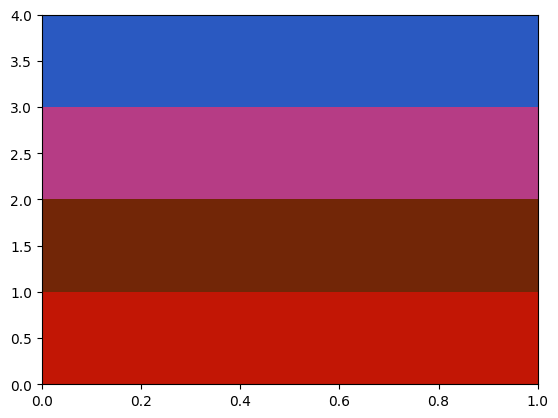

In [143]:
illuminant1 = colour.SDS_ILLUMINANTS["E"]
illuminant2 = colour.CCS_ILLUMINANTS["cie_10_1964"]["E"]

fig, ax = plt.subplots()

ax.set_xlim([0, 1])
ax.set_ylim([0, 4])



for i, color in enumerate([red, orange, pink, blue]):
    sd_color = colour.convert(color, "sRGB", "Spectral Distribution",
            XYZ_to_sd={"illuminant": illuminant1},
            sRGB_to_XYZ={"illuminant": illuminant2},    
            #             verbose={"mode": "Short"}
        )

    color_spectra = Spectra(wavelengths=sd_color.wavelengths, data=np.clip(sd_color.values,0,1))
    rect = plt.Rectangle((0,i), 1, 1, linewidth=1, edgecolor='none', facecolor=color_spectra.to_rgb().reshape(-1))
    ax.add_patch(rect)

    print(trichromat.observe(color_spectra))

plt.show()

Ehhh kinda close but not great visualizations. The Projection data is confusing. Worth trying new cone data and seeing if it helps. 

In [135]:
dichromat.observe(red_spectra)

array([ 0.26117586,  0.09817599])

In [136]:
dichromat.observe(orange_spectra)

array([ 0.22563282,  0.15345629])

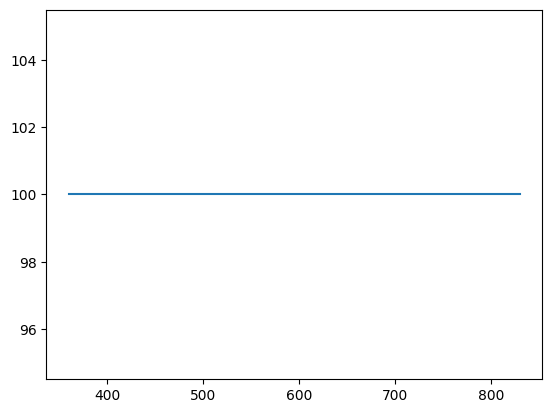

In [123]:
plt.plot(illuminant1.wavelengths, illuminant1.values)

In [46]:
pairs = np.load("./metamer_wavelengths.npy")

In [49]:
pairs[0][0]

118502

In [57]:
def remove_trailing_nans(arr):
    mask = np.any(np.isnan(arr), axis=1)
    idx = np.where(mask)[0]
    if idx.size > 0:
        last_valid_idx = np.where(~mask)[0][-1]
        return arr[:last_valid_idx + 1]
    return arr


In [58]:
cone_data = np.genfromtxt('linss2_10e_1.csv', delimiter=',')

s_cone = Cone(cone_data[:, [0, 1]])
m_cone = Cone(cone_data[:, [0, 2]])
l_cone = Cone(remove_trailing_nans(cone_data[:, [0, 3]]))
trichromat = Observer([s_cone, m_cone, l_cone], min_transition_size=10)

In [61]:
trichromat.get_transition(pairs[0][0])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0

In [100]:
dichromat = Observer([s_cone, m_cone], min_transition_size=10)
d1 = dichromat.observe(trichromat.get_transition(88046))
d2 = dichromat.observe(trichromat.get_transition(10381))

In [101]:
d1, d2

(array([ 0.79941433,  0.89873796]), array([ 0.80113017,  0.90979993]))

In [104]:
illuminant1 = colour.SDS_ILLUMINANTS["E"]
illuminant2 = colour.CCS_ILLUMINANTS["cie_10_1964"]["E"]


in_gamut_pairs = []

for (i,j) in pairs:
    t1 = trichromat.get_transition(i)
    t2 = trichromat.get_transition(j)

    
    sd1 = colour.SpectralDistribution(data=t1, domain=trichromat.wavelengths)
    sd2 = colour.SpectralDistribution(data=t2, domain=trichromat.wavelengths)

    rgb1 = colour.convert(sd1, "Spectral Distribution", "sRGB", 
            sd_to_XYZ={"illuminant": illuminant1},
            XYZ_to_sRGB={"illuminant": illuminant2},
           )
    print(type(rgb1))
    break

    rgb2 = colour.convert(sd2, "Spectral Distribution", "sRGB", 
            sd_to_XYZ={"illuminant": illuminant1},
            XYZ_to_sRGB={"illuminant": illuminant2},
           )
    
    tolerance = 0.1

    if np.all((rgb1 >= 0 - tolerance) & (rgb1 <= 1 + tolerance)) and \
       np.all((rgb2 >= 0 - tolerance) & (rgb2 <= 1 + tolerance)):
        print(i,j)
        # Clip the RGB values to be within [0, 1]
        rgb1_clipped = np.clip(rgb1, 0, 1)
        rgb2_clipped = np.clip(rgb2, 0, 1)
        
        in_gamut_pairs.append((rgb1_clipped, rgb2_clipped))

print(len(in_gamut_pairs))

<class 'numpy.ndarray'>
0


In [95]:
in_gamut_pairs

[(array([ 0.64311933,  0.98543334,  1.        ]),
  array([ 0.52242024,  1.        ,  0.11943936]))]

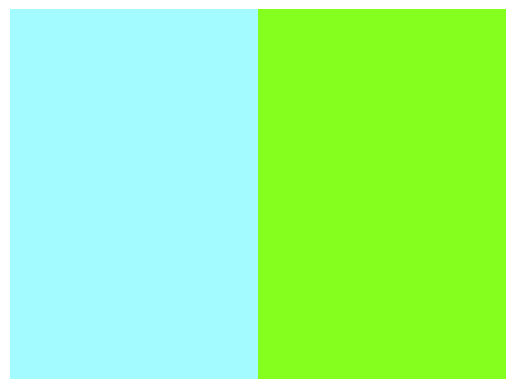

In [98]:
def show_confusions(pairs):
    fig, ax = plt.subplots()

    ax.set_xlim([0, 2])
    ax.set_ylim([0, len(pairs)])

    ax.axis('off')

    for i, (a,b) in enumerate(pairs):

    
        rect_a = plt.Rectangle((0, i), 1, 1, linewidth=1, edgecolor='none', facecolor=a)
        rect_b = plt.Rectangle((1, i), 1, 1, linewidth=1, edgecolor='none', facecolor=b)

        ax.add_patch(rect_a)
        ax.add_patch(rect_b)
    fig.savefig("gamut_metamers.png")

    plt.show()
    
show_confusions(in_gamut_pairs)

In [20]:
def interpolate_data(wavelengths, data, new_wavelengths):
    return np.interp(new_wavelengths, wavelengths, data)
new_wavelengths = np.arange(400, 701, 5)
new_data = interpolate_data(blue.wavelengths(), blue.data(), new_wavelengths)

In [36]:
blue_sd = colour.SpectralDistribution(data=new_data, domain=new_wavelengths)
# blue_xyz = colour.convert(
#     blue_sd, "Spectral Distribution", "XYZ", verbose={"mode": "Short"}
# )
# print(blue_xy)
blue_rgb = colour.convert(
    blue_sd, "Spectral Distribution", "sRGB", verbose={"mode": "Long"}
)
print(blue_rgb)

*                                                                             *
*   [ Conversion Path ]                                                       *
*                                                                             *
*   "sd_to_XYZ" --> "XYZ_to_sRGB"                                             *
*                                                                             *
*                                                                             *
*   [ "sd_to_XYZ" ]                                                           *
*                                                                             *
*   [ Signature ]                                                             *
*                                                                             *
*   <Signature (sd: 'ArrayLike | SpectralDistribution |                       *
*   MultiSpectralDistributions', cmfs: 'MultiSpectralDistributions | None'    *
*   = None, illuminant: 'SpectralDistrib

**That's a huge result!**
our XYZ conversions match closely and our RGB conversions differ seriously. Ok! Time to dig!.

This online calculator agrees with *their* results https://www.nixsensor.com/free-color-converter/

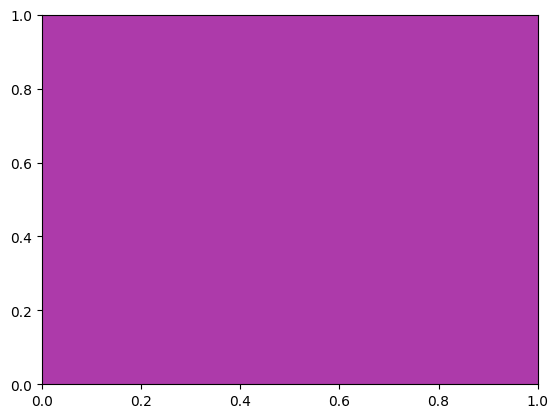

In [29]:
fig, ax = plt.subplots()

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

rect_a = plt.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='none', facecolor=blue_rgb.reshape(-1))

ax.add_patch(rect_a)
plt.show()

SpectralDistribution([[ 360.,  100.],
                      [ 365.,  100.],
                      [ 370.,  100.],
                      [ 375.,  100.],
                      [ 380.,  100.],
                      [ 385.,  100.],
                      [ 390.,  100.],
                      [ 395.,  100.],
                      [ 400.,  100.],
                      [ 405.,  100.],
                      [ 410.,  100.],
                      [ 415.,  100.],
                      [ 420.,  100.],
                      [ 425.,  100.],
                      [ 430.,  100.],
                      [ 435.,  100.],
                      [ 440.,  100.],
                      [ 445.,  100.],
                      [ 450.,  100.],
                      [ 455.,  100.],
                      [ 460.,  100.],
                      [ 465.,  100.],
                      [ 470.,  100.],
                      [ 475.,  100.],
                      [ 480.,  100.],
                      [ 485.,  100.],
            